# Network Anomaly Package

In this notebook, we will train a machine learning model to classify malicious network packages. The primary goal is to preprocess the data, build the model, and evaluate its performance. This will include:

- Data Loading & Preprocessing: We will load the dataset, perform necessary cleaning, handle missing values, and normalize/scale the features.

- Model Selection: We will choose an appropriate model (e.g., decision trees, neural networks, etc.) based on the problem type and data characteristics.

- Model Training: We will train the model using the training data and optimize hyperparameters for better performance.

- Evaluation: After training, we will evaluate the model on a validation/test set to measure its accuracy and generalization.

By the end of this notebook, we aim to have a well-trained model that can make predictions with high accuracy.

In [5]:
%load_ext autoreload
%autoreload 2

Loaded UNSW-NB15 dataset with shape: (175341, 36)


RandomForest model:


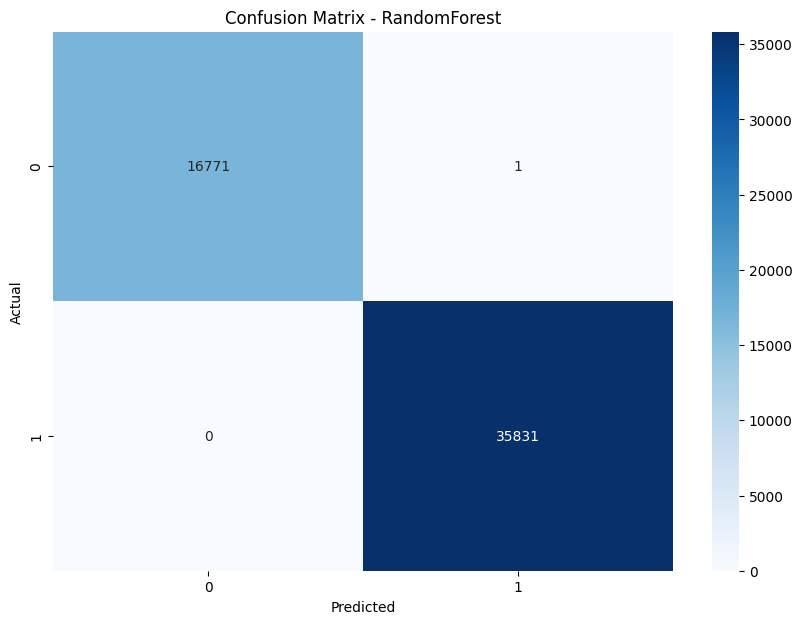

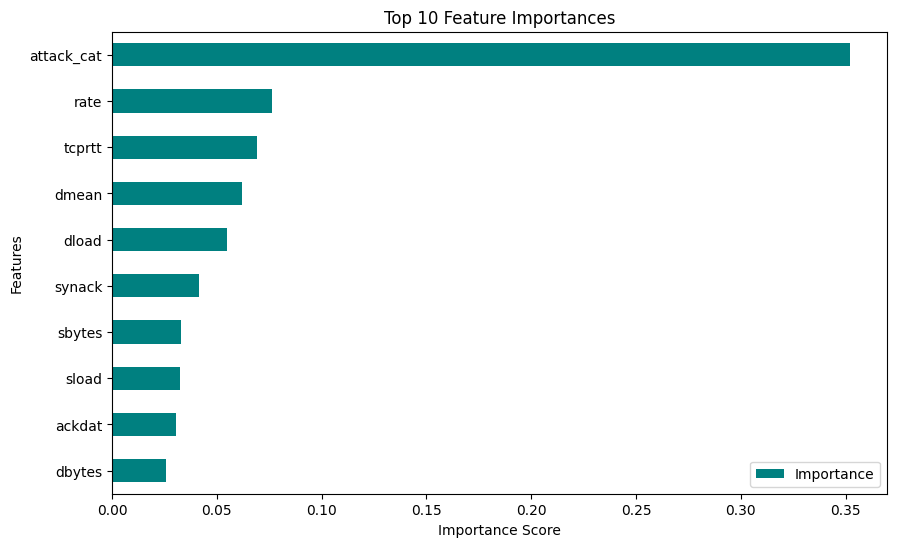


Model saved as 'RandomForest_UNSW-NB15_model.pkl'


LogisticRegression model:


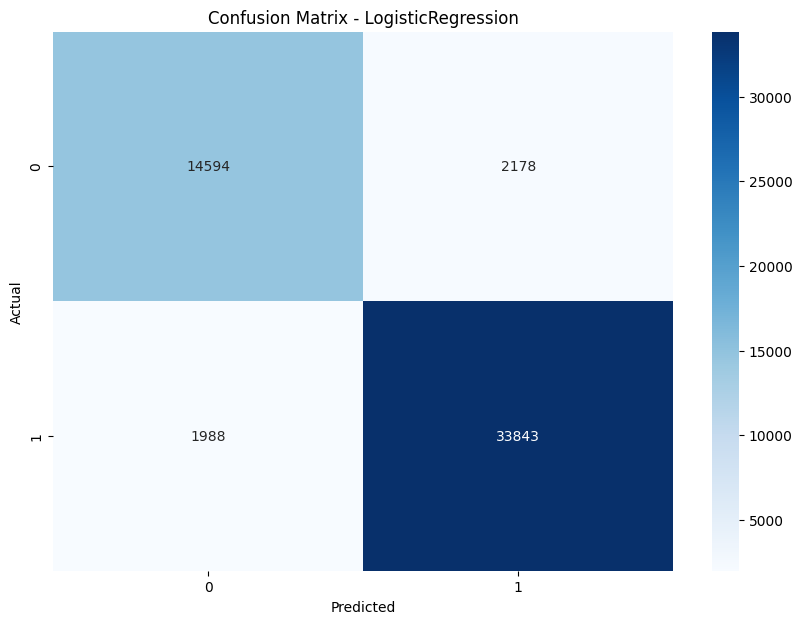


Model saved as 'LogisticRegression_UNSW-NB15_model.pkl'


DecisionTree model:


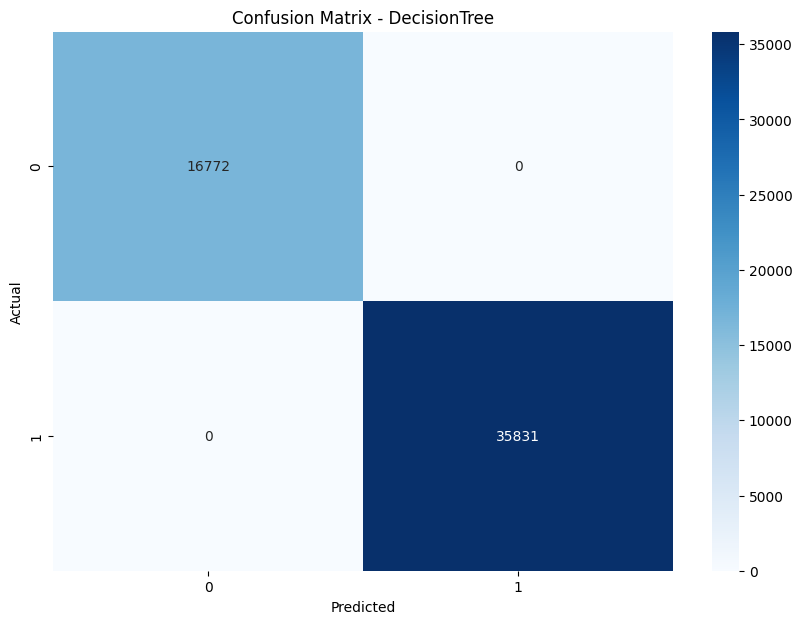

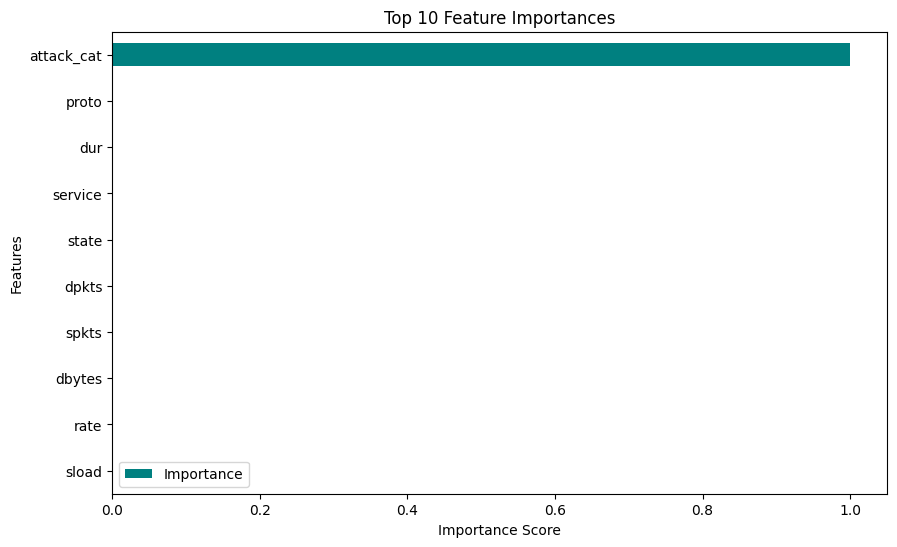


Model saved as 'DecisionTree_UNSW-NB15_model.pkl'


In [10]:
from network_anomaly.train.data import load_dataset, preprocess_data
from sklearn.model_selection import train_test_split
from network_anomaly.train.train import train_and_evaluate
from network_anomaly.train.plot import plot_confusion_matrix, feature_importance
import joblib
from pathlib import Path

# Load dataset
dataset_name = "UNSW-NB15" # or "CICIDS2017"
dataset_path = f"data/{dataset_name}.parquet"
df = load_dataset(dataset_path)

# Preprocess data
X, y = preprocess_data(df, "label")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train and evaluate the model
model_names = ["RandomForest", "LogisticRegression", "DecisionTree"]
models = {}
for model_name in model_names:
    model = train_and_evaluate(X_train, X_test, y_train, y_test, model_name)
    models[model_name] = model

# Plot confusion matrix
for model_name, model in models.items():
    print(f"\n\n{model_name} model:")
    model = models[model_name]
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)
    feature_importance(model, df.drop("label", axis=1).columns)
    joblib.dump(model, f"models/{model_name}_{dataset_name}_model.pkl")
    print(f"\nModel saved as '{model_name}_{dataset_name}_model.pkl'")